# Stoichiometry
This Jupyter Notebook was written by Dan Haworth. It is intended as a tutorial to be used in parallel with Chapter 2 of the book "An Introduction to Combustion: Concepts and Applications" by Stephen R. Turns and Daniel C. Haworth. That book is referred to as "Turns 4th ed." throughout this Notebook.

This Notebook was last updated 6 February 2020.

The objectives of this tutorial Notebook are to review stoichiometry basics, and to show how to perform basic stoichiometric manipulations using Cantera's `Solution()` object. This includes information on how to approximate the product composition for fuel-lean-to-stoichiometric hydrocarbon-air reactant mixtures. User-defined functions are introduced, and an example of a three-dimensional NumPy array is provided. We will define the gas mixture using gri30.cti.

The reader should be familiar with the material in the previous Notebook (2_2_Specific_heats) before working through this Notebook.

## 1. Basic concepts and definitions

Stoichiometry is the specification and/or calculation of the relative proportions of individual species (molecules) in the reactants and/or products of a global or elementary chemical reaction. Here we consider global reactions, where a specified reactant mixture (e.g., a fuel-air mixture) reacts to eventually form a specified product mixture (a mixture containing the combustion products), without regard to the detailed physical processes by which the chemical reactions occur. Those will be discussed later, in Chapters 4 and 5 of Turns 4th ed.

The underlying physical principle that is invoked in stoichiometry is that elements (or atoms) are neither created nor destoyed in chemical reactions: they are only rearranged from one set of molecular structures to another set.

### 1.1 Reactant mixtures: Fuel and air

The *reactants* are a specified mixture of species or molecules that will eventually react chemically to form a different mixture of species or molecules (the *products*). The reactants usually consist of one or more types of fuel molecules and an oxidizer. The fuel-oxidizer reactant mixtures that are of interest for present purposes are often hydrocarbon-air mixtures. In that case, the fuel molecule contains (at most) hydrogen and carbon atoms, and the oxidizer is ambient air. In this Notebook, we extend the fuel molecules that are considered to include those that contain oxygen atoms, in addition to carbon and hydrogen, and we adopt a simplified representation for air. However, it is emphasized that the general concept of element balances applies to any reacting system.

We consider a generic fuel molecule that contains $x$ atoms of carbon, $y$ atoms of hydrogen, and $z$ atoms of oxygen. We could consider fuel molecules that also contain nitrogen, for example, but most of the fuels of interest for our purposes do not. Moreover, it would then be necessary to consider the nitrogen as participating chemically. As we will see shortly, as a first approximation we will often assume that the only nitrogen in the system is in the form of diatomic nitrogen molecules ($N_2$) from air, and that $N_2$ does not participate chemically: that is, all $N_2$ in the reactants remains as $N_2$ in the products.

The oxidizer is taken to be air. Our standard approximation for the composition of air is that it is mixture of just two gases: 21% molecular oxygen ($O_2$) and 79% molecular nitrogen ($N_2$), on a volume (or molar) basis. Thus for every mole of $O_2$, there are 79/21 = 3.76 (to three significant figures) moles of $N_2$. Looking ahead, in our global reaction expressions we will normally write $ O_2 + 3.76 N_2 $ to represent the air in the reactants. That can be read as 1 mole of $O_2$ and 3.76 moles of $N_2$, or as 4.76 moles of air. The molecular weight of air is computed using the usual mixture formula, as 0.21 times the molecular weight of $O_2$ plus 0.79 times the molecular weight of $N_2$. Using approximate molecular weights for $O_2$ (32 kg/kmol) and for $N_2$ (28 kg/kmol), this gives $MW_{air} \approx $ 28.85 kg/kmol. That is slightly lower than the value that is found in various sources as the molecular weight for air. In some applications, a more accurate approximation may be needed for the composition of air: for example, to account for moisture ($H_2O$) in the air. That is straightforward to do. However, unless stated otherwise, we will consider only $O_2$ and $N_2$ in the molar ratio of 1.0:3.76 to represent air throughout Turns 4th ed. and these tutorial Notebooks.

### 1.2 Stoichiometric reactants and complete combustion

We first consider the case of *complete combustion* of a stoichiometric reactant mixture. In the context of the fuel-air reactant mixtures considered here, complete combustion means that all fuel carbon reacts to form product carbon dioxide ($CO_2$) and all fuel hydrogen reacts to form product water ($H_2O$). *Stoichiometric reactants* means that the proportions of fuel to air in the reactants are such that complete combustion can be realized (in principle, at least), with no leftover fuel and no leftover oxygen in the products. With our usual approximation for air, and assuming that the nitrogen does not participate chemically, we can write the global reaction as:

$ \ \ \ \ \ \ \ \ \ \ \ \ $ $ C_x H_y O_z + a ( O_2 + 3.76 N _ 2 ) \rightarrow b CO_2 + c H_2 O + d N_2 $

Here the reaction has been written on the basis of one molar unit of fuel. That is not a requirement, but it is the convention that we will follow, in most cases. It is important to note that a global reaction of this kind is intended only to provide information about the relative proportions of the various reactant and product species that are involved. The global reaction can be multiplied through by any integer or noninteger constant, without changing its fundamental meaning.

It remains to determine how much air is needed (the value of $a$), how much $CO_2$ is formed (the value of $b$), how much $H_2O$ is formed (the value of $c$), and how much $N_2$ remains (the value of $d$). These four unknowns can be found by performing element balances for the four elements in the system: carbon (C), hydrogen (H), oxygen (O), and nitrogen (N). Here the symbols C, H, O, and N are interpreted as representing their respective elements, regardless of which molecular species they are bound up in. 

### 1.3 Element balances

To determine the values of the coefficients $a$, $b$, $c$, and $d$ in the above global reaction representing stoichiometric complete combustion, we equate the numbers of carbon, hydrogen, oxygen, and nitrogen atoms on the reactant side (left-hand side) and the product side (right-hand side). Since there are four elements in the system, the resulting four linear equations are sufficient to solve for the four unknown coefficients:

$ \ \ \ \ \ \ \ \ \ \ \ \ $ C balance: $x = b$; H balance: $y = 2 c$; O balance: $z + 2a = 2b + c$; N balance: $2 \cdot 3.76 a = 2 d$.

Solving for $a$, $b$, $c$, and $d$ in terms of the known values of $x$, $y$, and $z$ (assuming that the fuel composition is given, which would normally be the case):

$ \ \ \ \ \ \ \ \ \ \ \ \ $ $b = x$, $c = y/2$, $a = x + y/4 - z/2$, and $d = 3.76 \cdot a = 3.76 \cdot ( x + y/4 - z/2)$.

The global balanced reaction for complete combustion of stoichiometric reactants is then:

$ \ \ \ \ \ \ \ \ \ \ \ \ $ Complete combustion of stoichiometric reactants:
$ C_x H_y O_z + (x+y/4-z/2)( O_2 + 3.76 N _ 2 ) \rightarrow x CO_2 + y/2 H_2 O + 3.76 (x+y/4-z/2) N_2 $

It can be seen that in the case of complete combustion, the carbon balance requires that for each molecule (or mole) of fuel that is burned, $x$ molecules (or moles) of $CO_2$ will be formed. And the hydrogen balance requires that for each molecule (or mole) of fuel that is burned, $y/2$ molecules (or moles) of $H_2O$ will be formed. The amount of air that is required is then determined by the oxygen balance, and can be written in terms of the known fuel composition (the values of $x$, $y$, and $z$), as shown. The amount of $N_2$ on the right-hand side is equal to the amount of $N_2$ on the left-hand side: nitrogen does not participate chemically here.

### 1.4 Nonstoichiometric reactants, equivalence ratio, and global reaction for fuel-lean-to-stoichiometric reactant mixtures

The relative proportions of fuel and oxidizer in a reactant mixture can be specified in various ways. The one that we will use most often as we work through Turns 4th ed. is the *equivalence ratio*, which is donated as $\Phi$. The equivalence ratio is defined such its value is equal to one when the fuel and oxidizer are in stoichiometric proportion (as in the example above). 

If in a fuel-air reactant mixture, there is more fuel than is needed for the given amount of air (or equivalently, too little air relative to the given amount of fuel), then complete combustion (in the sense defined above) is not possible. There is not enough $O_2$ from the air to convert all fuel carbon to $CO_2$ and all fuel hydrogen to $H_2O$. In this case, the reactants are said to be *fuel rich* and the value of $\Phi$ is greater than one.

On the other hand, if in a fuel-air reactant mixture there is less fuel than is needed for the given amount of air (or equivalently, too much air relative to the given amount of fuel), then complete combustion (in the sense defined above) is still possible. That is, there is enough $O_2$ from the air to convert all fuel carbon to $CO_2$ and all fuel hydrogen to $H_2O$. However, there will be leftover $O_2$ remaining in the products. In this case, the reactants are said to be *fuel lean* and the value of $\Phi$ is less than one.

To quantify this, the equivalence ratio $\Phi$ is defined as the actual fuel-to-oxidizer mass ratio in the reactants (denoted as $(F/O)$), divided by the fuel-to-oxidizer mass ratio corresponding to stoichiometric reactants (denoted as $(F/O)_{stoich}$). For a fixed amount of fuel, then, $\Phi$ is equal to the mass of oxidizer corresponding to a stoichiometric reactant mixture divided by the actual mass of oxidizer in the reactants: $ \Phi = O_{stoich}/O $. Therefore, to adjust the left-hand side (reactant side) of the above global balanced reaction for cases where $ \Phi \ne 1 $, we can simply divide the coefficient multiplying the oxidizer (here, air) by $ \Phi $ while keeping the amount of fuel unchanged:

$ \ \ \ \ \ \ \ \ \ \ \ \ $ Reactant composition for any $\Phi > 0 $: $ C_x H_y O_z + \Phi ^ {-1} (x+y/4-z/2)( O_2 + 3.76 N _ 2 ) $

It is emphasized that this is valid for fuel-lean, stoichiometric, or fuel-rich reactants. It does not depend on what we eventually assume about the product composition (the right-hand side), because the equivalence ratio is *defined* in terms of stoichiometric complete combustion.

The right-hand side (product side) requires additional consideration. In the case of fuel-lean reactants ($ 0 < \Phi < 1 $), a reasonable first approximation for some purposes is that all fuel carbon is still converted to $CO_2$ and all fuel hydrogen is still converted to $H_2O$ (complete combustion, in the sense defined earlier); however, it is necessary to allow for leftover $O_2$ in the products. The oxygen balance tells us how much $O_2$ remains in the products, and (by assumption) all of the $N_2$ in the reactants still appears in the products (nitrogen does not participate chemically). The resulting global balanced reaction is:

$ \ \ \ \ \ \ \ \ \ \ \ \ $ $ 0 < \phi \le 1 $, complete combustion:
$ \ \ \ \ \ \ \ \ \ \ \ \ $ $ C_x H_y O_z + \phi ^ {-1} (x+y/4-z/2)( O_2 + 3.76 N _ 2 ) \rightarrow x CO_2 + y/2 H_2 O + ( \phi ^ {-1} - 1 ) (x+y/4-z/2) O_2 + 3.76 \phi ^ {-1} (x+y/4-z/2) N_2 $

It is straightforward to confirm that the element balances for C, H, O, and N are satisfied, and that this reduces to the earlier stoichiometric-reactants result for $ \Phi = 1 $. Note that the amounts of $CO_2$ and $H_2O$ that are formed remain the same as in the case of stoichiometric reactants, since the amount of fuel (hence the amounts of C and of H in the system) was held fixed.

Finally, it is emphasized that this global balanced reaction provides only a first approximation to the actual products of fuel-lean-to-stoichiometric combustion. In a real combustion system, many more product species may be present, even if the reactant fuel and oxidizer are in stoichiometric proportion. While element balances (the basis for stoichiometry) are almost always the first tool that we apply in the analysis of any combustion system, additional concepts and tools are needed to compute the actual product composition in a real combustion system. We will develop the necessary concepts and tools as we move through Chapter 2 and subsequent chapters of Turns 4th ed.

### 1.5 Other ways of specifying the relative proportions of fuel and oxidizer in a reactant mixture

Different ways of specifying the relative proportions of fuel and oxidizer (here, air) are used in different combustion applications, following historical conventions that vary from one area of application to another. Four examples follow, and the relationship to the equivalence ratio $\Phi$ is given for each. Here the oxidizer is taken to be air, in all cases, but the definitions extend directly to other oxidizers by replacing "air" with "oxidizer" in each definition.

**Fuel-air ratio (F/A)**: The fuel-air ratio, or fuel-to-air ratio, is defined as the mass of fuel divided by the mass of air in the reactant mixture. It is important to note that this quanitity is defined on a mass basis, rather than on a molar basis. For the global reaction considered above, and using approximate molecular weights (12 mass units for each C atom, 1 mass unit for each H atom, 16 mass units for each O atom, and 14 mass units for each N atom):

$$ (F/A) = \frac{12 x + y + 16 z}{\Phi ^ {-1} \cdot ( x + y/4 - z/2 ) \cdot (32 + 3.76 \cdot 28 ) } = \frac{\Phi \cdot (12 x + y + 16 z)}{( x + y/4 - z/2 ) \cdot 137.28}\ , $$

which can then be further simplified. Recall that $ \Phi $ was defined as the actual fuel-air ratio divided by the fuel-air ratio for stoichiometric reactants (that is, for $\Phi=1$), and the formula is consistent with that definition.

**Air-fuel ratio (A/F)**: The air-fuel ratio, or air-to-fuel ratio, is simply the inverse of the fuel-air ratio. Again, it is important to note that this quantity is defined on a mass basis, rather than on a molar basis.

**Air-fuel equivalence ratio $ \lambda $**: Recall that $ \Phi $ was defined in terms of the fuel-air ratio. That is, $\Phi$ is the fuel-air equivalence ratio. In some cases, the air-fuel equivalence ratio $\lambda$ is used instead. The relationship between $\Phi$ and $\lambda$ is simply $ \lambda = \Phi ^ {-1} $. Thus fuel-lean (air-rich) mixtures correspond to $ \lambda > 1 $, stoichiometric mixtures to $ \lambda = 1 $, and fuel-rich (air-lean) mixtures to $ 0 < \lambda < 1 $.

**Excess air and percent stoichiometric air**: For fuel-lean combustion systems, the amount of air in the reactants that is in excess of that needed for stoichiometric complete combustion is sometimes expressed as a percentage of the amount of air required for stoichiometric complete combustion. For example, 20% excess air, or 120% stoichiometric air, both mean that there is 20% more air in the reactants compared to what is needed for stoichiometric complete combustion. The relationship between percent excess air and $ \Phi $ is then: $ \% \ excess \ air = 100 \cdot ( \Phi ^ {-1} - 1 ) $. The relationship between percent stoichiometric air and $ \Phi $ is: $ \% \ stoichiometric \ air = 100 \cdot \Phi ^ {-1} $.

Another quantity that is related to the relative proportions of fuel and oxidizer, and that will be useful in the analysis of nonpremixed flames, is a *mixture fraction*. We defer the definition and discussion of mixture fraction until we get to Chapter 7 of Turns 4th ed.

### 1.6 Global reaction for fuel-rich reactant mixtures

As noted earlier, the assumption of complete combustion can be a useful first approximation for fuel-lean and stoichiometric reactant mixtures. In that case, the only product species in the global reaction are $CO_2$, $H_2O$, $N_2$, and (in the case $ 0 < \Phi < 1 $) $O_2$. An appropriate global reaction is given in Section 1.4 above. Since there are (at most) four product species, and there are (at most) four elements in the system (C, H, O, and N), element balances alone are sufficient to determine the product composition in this case. Again, it is emphasized that this is only a first approximation to the actual product composition in a real combustion system.

In the case of fuel-rich reactant mixtures ($ \Phi > 1 $), it is *not* reasonable to assume that all fuel carbon reacts to form $CO_2$ and that all fuel hydrogen reacts to form $H_2O$. In fact, this is simply not possible, as there is not enough $O_2$ in the reactants to accomplish that. As we will see, at a minimum it is usually necessary to allow for two carbon-containing species (e.g., $CO$ and $CO_2$) and two hydrogen-containing species (e.g., $H_2$ and $H_2O$) in the products of fuel-rich combustion. And as a first approximation, it is often reasonable to assume that all $O_2$ is consumed, so that there is no $O_2$ remaining in the products. In that case, there would be five product species (including the $N_2$), but there are still only four elements in the system. Therefore, element balances alone are generally insufficient to determine the product composition for fuel-rich combustion, even as a first approximation. Additional concepts and tools are needed, and those will be developed as we continue to work through Chapter 2 and subsequent chapters in Turns 4th ed. 

With this background on stoichiometry, now let's look at what stoichiometry tools are available in Cantera.

## 2. Manipulating stoichiometry in Cantera

In [1]:
# access modules
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

# report Cantera version
print("Running Cantera version: {}".format(ct.__version__))

Running Cantera version: 2.4.0


In [2]:
# define an ideal-gas mixture named "gas1" using Cantera's "Solution" object and GRI-Mech 3.0
gas1 = ct.Solution('gri30.cti')

# show all available attributes of "gas1", for future reference
dir(gas1)

['DP',
 'DPX',
 'DPY',
 'HP',
 'HPX',
 'HPY',
 'ID',
 'P',
 'P_sat',
 'SP',
 'SPX',
 'SPY',
 'SV',
 'SVX',
 'SVY',
 'T',
 'TD',
 'TDX',
 'TDY',
 'TP',
 'TPX',
 'TPY',
 'T_sat',
 'UV',
 'UVX',
 'UVY',
 'X',
 'Y',
 '__call__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_check_kinetics_species_index',
 '_check_phase_index',
 '_check_reaction_index',
 '_full_states',
 '_init_cti_xml',
 '_init_parts',
 '_references',
 'activities',
 'activity_coefficients',
 'add_reaction',
 'add_species',
 'atomic_weight',
 'atomic_weights',
 'basis',
 'binary_diff_coeffs',
 'chemical_potentials',
 'concentrations',
 'cp',
 'cp_mass',
 'cp_mole',
 'cr

Scrolling down in the window above, you should spot a couple of familiar options for specifying or querying mixture composition (e.g., `X` for mole fractions, `Y` for mass fractions), and some others that look like they might be relevant for stoichiometry. Here will will focus on [`n_atoms()`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.n_atoms) (which we have worked with earlier) and [`set_equivalence_ratio()`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.set_equivalence_ratio).

### 2.1 The `n_atoms()` attribute

We have used `n_atoms()` in previous tutorial Notebooks. Here we will expand on what was done earlier.

As a reminder, let's recall what `n_atoms()` does:

In [3]:
# get help for attribute "n_atoms"
help(gas1.__class__.n_atoms)

Help on method_descriptor:

n_atoms(...)
    ThermoPhase.n_atoms(self, species, element)
    
    Number of atoms of element *element* in species *species*. The element
    and species may be specified by name or by index.
    
    >>> phase.n_atoms('CH4','H')
    4



That is, for a specified species that is contained in ThermoPhase (here the ThermoPhase is named "gas1"), we can access the number of atoms of each element in any of the available species. The element and species can be specified either by name or by index number. The current thermochemical state of ThermoPhase (e.g., its pressure, temperature, and composition) does not affect the values reported by `n_atoms()`. 

For example, one of the 53 species in gas1 is CH3OH (methanol), which can be used as a fuel:

In [4]:
# report the numbers of atoms of carbon, hydrogen, oxygen, and nitrogen in a molecule of methanol
methanol = 'CH3OH'
x = gas1.n_atoms(methanol,'C') # number of carbon atoms in a methanol molecule
y = gas1.n_atoms(methanol,'H') # number of hydrogen atoms in a methanol molecule
z = gas1.n_atoms(methanol,'O') # number of oxygen atoms in a methanol molecule
w = gas1.n_atoms(methanol,'N') # number of nitrogen molecules in a methanol molecule

x,y,z,w

(1.0, 4.0, 1.0, 0.0)

The chemical formula for methanol could be written as "CH4O", but it is conventionally written as "CH3OH" to emphasize its molecular structure. When accessing methanol here, the name must the one that is provided in gri30.cti, which is "CH3OH".

For stoichiometric or fuel-lean reactants ($0 < \Phi \le 1$) and complete combustion (making the first approximation for product composition discussed above), we could write the four linear equations corresponding to the four element balances in Cantera, and solve those equations to find the relative proportions of fuel and air in the reactants and the relative proportions of CO2, H2O, O2, and N2 in the products. But it is (almost) as easy to do that manually; we will not explicitly code the element balance equations in Cantera.

For our methanol-air example, let's compute the reactant species mole fractions and complete-combustion product species mole fractions for fuel-lean reactants at an equivalence ratio of 0.8, using the results from Section 1.4 above:

In [5]:
# specify the fuel and equivalence ratio
fuel = methanol  # "methanol" was defined above
phi  = 0.8       # equivalence ratio

# compute the numbers of reactant moles for each species, and the reactant species mole fractions
# here we use a one-mole-of-fuel basis, as we did in the development above
# this reactant composition calculation is valid for any positive value of phi: fuel-lean, stoichiometric, or fuel-rich
# the values of x, y, and z for methanol were found above
N_fuel_reac = 1.
N_O2_reac   = ( x + y/4. - z/2. ) / phi
N_N2_reac   = 3.76*N_O2_reac
N_tot_reac  = N_fuel_reac + N_O2_reac + N_N2_reac

X_fuel_reac = N_fuel_reac / N_tot_reac
X_O2_reac   = N_O2_reac   / N_tot_reac
X_N2_reac   = N_N2_reac   / N_tot_reac

X_fuel_reac,X_O2_reac,X_N2_reac

(0.10075566750629722, 0.18891687657430728, 0.7103274559193954)

In [6]:
# compute the numbers of product moles for each species, and the product species mole fractions
# this is, again, on a one-mole-of-fuel basis
# this complete-combustion product composition calculation is appropriate only for values of phi between 0 and 1:
#   that is, fuel-lean or stoichiometric reactants
N_CO2_prod = x
N_H2O_prod = y/2.
N_O2_prod  = ( 1./phi - 1. )*( x + y/4. - z/2. )
N_N2_prod  = 3.76*( x + y/4. - z/2. ) / phi
N_tot_prod = N_CO2_prod + N_H2O_prod + N_O2_prod + N_N2_prod

X_CO2_prod = N_CO2_prod / N_tot_prod
X_H2O_prod = N_H2O_prod / N_tot_prod
X_O2_prod  = N_O2_prod  / N_tot_prod
X_N2_prod  = N_N2_prod  / N_tot_prod

X_CO2_prod,X_H2O_prod,X_O2_prod,X_N2_prod

(0.0959232613908873,
 0.1918465227817746,
 0.03597122302158274,
 0.6762589928057554)

Now the gas1 mixture composition can be set to correspond to either the reactant composition or the product composition. For present purposes of stoichiometry calculations, the mixture temperature and pressure don't matter.

In [7]:
# set gas1 to the reactant composition
X_reactants = {'CH3OH':X_fuel_reac , 'O2':X_O2_reac , 'N2':X_N2_reac}
gas1.X = X_reactants
gas1()


  gri30:

       temperature             300  K
          pressure         7001.82  Pa
           density       0.0818891  kg/m^3
  mean mol. weight         29.1723  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -6.9203e+05       -2.019e+07     J
   internal energy     -7.7753e+05       -2.268e+07     J
           entropy            7813        2.279e+05     J/K
    Gibbs function     -3.0359e+06       -8.856e+07     J
 heat capacity c_p          1050.8        3.065e+04     J/K
 heat capacity c_v          765.77        2.234e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.188917         0.207221         -29.0123
             CH3OH       0.100756         0.110668         -114.368
                N2       0.710327         0.682111         -26.0473
     [  +50 minor]        

In [8]:
# set gas1 to the complete-combustion product composition
X_products = {'CO2':X_CO2_prod , 'H2O':X_H2O_prod , 'O2':X_O2_prod , 'N2':X_N2_prod}
gas1.X = X_products
gas1()


  gri30:

       temperature             300  K
          pressure         7354.55  Pa
           density       0.0818891  kg/m^3
  mean mol. weight         27.7731  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -3.0275e+06       -8.408e+07     J
   internal energy     -3.1173e+06       -8.658e+07     J
           entropy          8040.9        2.233e+05     J/K
    Gibbs function     -5.4397e+06       -1.511e+08     J
 heat capacity c_p          1106.6        3.074e+04     J/K
 heat capacity c_v          807.28        2.242e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2      0.0359712        0.0414442         -30.6218
               H2O       0.191847         0.124443         -123.934
               CO2      0.0959233         0.152002          -188.44
                N2       0

Now let's plot the product mole fractions as functions of equivalence ratio, for fuel-lean to stoichiometric reactants.

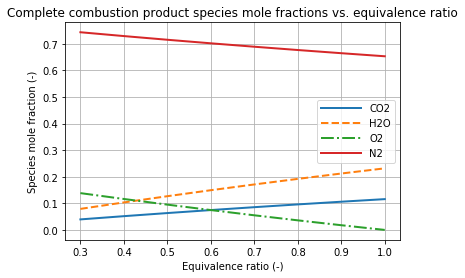

In [9]:
# specify the fuel and find the numbers of C, H, and O atoms in the fuel molecule
# we already did this, but it is repeated here, for completeness
fuel = 'CH3OH'
x = gas1.n_atoms(fuel,'C')
y = gas1.n_atoms(fuel,'H')
z = gas1.n_atoms(fuel,'O')

# specify the equivalence ratio range and increment for plotting
# in practice, equivalence ratios as low as 0.3 may be of limited interest for most fuels burning with air,
#   as the mixture is too lean to burn - we will discuss flammability limits in subsequent chapters
phi_min = 0.3
phi_max = 1.001 # 1.001 instead of 1.0 ensures that the value for phi=1.0 will be included
phi_inc = 0.1

# define and initialize arrays
phis  = np.arange(phi_min,phi_max,phi_inc)
nphi  = len(phis)
XCO2s = np.zeros(nphi)
XH2Os = np.zeros(nphi)
XO2s  = np.zeros(nphi)
XN2s  = np.zeros(nphi)

# fill arrays
for i , phi in enumerate(phis):   
    N_CO2_prod = x
    N_H2O_prod = y/2.
    N_O2_prod  = ( 1./phi - 1. )*( x + y/4. - z/2. )
    N_N2_prod  = 3.76*( x + y/4. - z/2. ) / phi
    N_tot_prod = N_CO2_prod + N_H2O_prod + N_O2_prod + N_N2_prod
    
    XCO2s[i] = N_CO2_prod / N_tot_prod
    XH2Os[i] = N_H2O_prod / N_tot_prod
    XO2s[i]  = N_O2_prod  / N_tot_prod
    XN2s[i]  = N_N2_prod  / N_tot_prod

# generate plot
fig, ax = plt.subplots()
ax.plot(phis , XCO2s , label='CO2' , ls='solid'  , lw=2)
ax.plot(phis , XH2Os , label='H2O' , ls='dashed' , lw=2)
ax.plot(phis , XO2s  , label='O2'  , ls='dashdot', lw=2)
ax.plot(phis , XN2s  , label='N2'  , ls='solid'  , lw=2)

ax.set(xlabel='Equivalence ratio (-)',
       ylabel='Species mole fraction (-)',
       title ='Complete combustion product species mole fractions vs. equivalence ratio')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Xprod_vs_phi_methanol.pdf")

For a fixed number of fuel moles (one mole of fuel, here), the total number of product moles increases with decreasing equivalence ratio, as can be seen from the global balanced reaction in Section 1.4 above. Therefore, while the product stoichiometric coefficients for CO2 and H2O are independent of equivalence ratio (for a fixed amount of fuel in the reactants), the mole fractions of CO2 and H2O in the products decrease with decreasing equivalence ratio. In contrast, the mole fractions of O2 and N2 in the products increase with decreasing equivalence ratio.

Note that the product mixture is dominated by N2. This is usually the case for the products of hydrocarbon-air reactant mixtures, and especially for fuel-lean reactant mixtures.

### 2.2 The `set_equivalence_ratio()` attribute

Cantera's `Solution()` object provides a way to specify directly the equivalence ratio of a fuel-oxidizer reactant mixture: the attribute `set_equivalence_ratio()`.

Let's see what `set_equivalence_ratio()` does:

In [10]:
# get help for attribute "set_equivalence_ratio"
help(gas1.__class__.set_equivalence_ratio)

Help on method_descriptor:

set_equivalence_ratio(...)
    ThermoPhase.set_equivalence_ratio(self, phi, fuel, oxidizer)
    
    Set the composition to a mixture of *fuel* and *oxidizer* at the
    specified equivalence ratio *phi*, holding temperature and pressure
    constant. Considers the oxidation of C to CO2, H to H2O and S to SO2.
    Other elements are assumed not to participate in oxidation (i.e. N ends up as
    N2)::
    
        >>> gas.set_equivalence_ratio(0.5, 'CH4', 'O2:1.0, N2:3.76')
        >>> gas.mole_fraction_dict()
        {'CH4': 0.049900199, 'N2': 0.750499001, 'O2': 0.199600798}
    
        >>> gas.set_equivalence_ratio(1.2, {'NH3;:0.8, 'CO':0.2}, 'O2:1.0')
        >>> gas.mole_fraction_dict()
        {'CO': 0.1263157894, 'NH3': 0.505263157, 'O2': 0.36842105}
    
    :param phi: Equivalence ratio
    :param fuel:
        Fuel species name or molar composition as string, array, or dict.
    :param oxidizer:
        Oxidizer species name or molar composition as 

This provides a way to specify the composition of the reactants for a given fuel, oxidizer, and equivalence ratio. It allows for a more general fuel and oxidizer compared to what we have done up to this point, and it is consistent with our  calculations above for the case of a fuel molecule that contains at most C, H, and O atoms and with our standard approximation for air. The resulting reactant composition is valid for any value of the equivalence ratio $\Phi$ greater than 0: fuel-lean, stoichiometric, or fuel-rich. As before, additional considerations are required to determine the corresponding product composition, especially for fuel-rich cases.

We first confirm that `set_equivalence_ratio()` gives the same same result as our manual calculation for methanol-air at an equivalence ratio of 0.8: 

In [11]:
fuel = 'CH3OH'
air  = 'O2:1.0 N2:3.76'
phi  = 0.8

gas1.set_equivalence_ratio(phi, fuel, air)
gas1()


  gri30:

       temperature             300  K
          pressure         7354.55  Pa
           density       0.0860145  kg/m^3
  mean mol. weight         29.1723  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -6.9203e+05       -2.019e+07     J
   internal energy     -7.7753e+05       -2.268e+07     J
           entropy          7798.9        2.275e+05     J/K
    Gibbs function     -3.0317e+06       -8.844e+07     J
 heat capacity c_p          1050.8        3.065e+04     J/K
 heat capacity c_v          765.77        2.234e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.188917         0.207221         -28.9632
             CH3OH       0.100756         0.110668         -114.319
                N2       0.710327         0.682111         -25.9982
     [  +50 minor]        

The reactant composition is the same as that from our earlier manual calculation.

Note that, in contrast to specifying the mixture composition using attributes `X` and `Y`, the mixture pressure and temperature do not change when `set_equivalence_ratio()` is used. Recall that when `X` or `Y` is used to change the composition, and nothing else is specified, the temperature and density remain constant as the composition changes. See the Notebook Getting_started_with_Cantera.

Now let's generalize this to look at how product composition varies with equivalence ratio (for $ 0< \Phi \le 1 $) for several fuels, assuming complete combustion.

## 3. A first approximation for estimating product composition for $0 < \Phi \le 1$

We define a function that calculates the product mole fractions for complete combustion of a fuel molecule that contains (at most) carbon, hydrogen, and oxygen atoms, burning with our standard approximation for air, and with nitrogen not participating chemically.

A function is a convenient way to isolate a group of commands that will eventually be repeated multiple times, with variations in one or more parameters (the function arguments). As is the case for the built-in functions that we have used earlier, a user-defined function is called with appropriate argument values enclosed in parentheses. At the end of the function definition, the quantity or quantities returned by the function are specified.

In [12]:
# define a function that returns the mole fractions of the four product species CO2, H2O, O2, and N2
#   for complete combustion of a specified fuel-air reactant mixture at a given equivalence ratio
# the function is not executed when it is defined - it will be executed later, when it is called with appropriate
#   values for its arguments
# the function takes two arguments: the fuel type (denoted here as "fuel"), and the equivalence ratio
#   (denoted here as "phi")
# the product mole fractions are returned in an array that contains four values
# the standard approximation is used for air
# complete combustion is assumed - this is appropriate as a first approximation for stoichiometric
#   or fuel-lean reactants
# the ideal-gas mixture "gas" must be defined before calling this function
# the specified fuel must be one that is available in "gas"
# the specified fuel must contain (at most) C, H, and O atoms

def products_complete(fuel,phi):

# set the mixture thermochemical state to correspond to fuel-air reactants with the specified equivalence ratio
# for the present purposes of computing the product composition, the temperature and pressure of the gas mixture
#   don't matter
    air = 'O2:1.0 N2:3.76'
    gas.set_equivalence_ratio(phi, fuel, air)
    
# compute the product composition corresponding to complete combustion,
#   allowing for left-over O2 for 0<phi<1

# x, y, and z are the numbers of atoms of carbon, hydrogen, and oxygen in the fuel molecule, respectively
    x = gas.n_atoms(fuel,'C')
    y = gas.n_atoms(fuel,'H')
    z = gas.n_atoms(fuel,'O')
    
# a is the number of moles of O2 needed per mole of fuel for complete combustion
    a = x + y/4. - z/2.
    
# compute the numbers of product moles per mole of fuel, for complete combustion
# these expressions are appropriate only for phi less than or equal to unity
    N_CO2 = x
    N_H2O = y/2.
    N_O2  = ( 1./phi - 1.)*a
    N_N2  = 3.76*a / phi
    
# compute the total number of product moles per mole of fuel
    N_prod = N_CO2 + N_H2O + N_O2 + N_N2
    
# compute the product mole fractions
    nprods     = 4
    X_products = np.zeros(nprods)
    
# remember that arrays are indexed starting with an index value of 0
    X_products[0] = N_CO2 / N_prod # CO2 product mole fraction
    X_products[1] = N_H2O / N_prod # H2O product mole fraction
    X_products[2] = N_O2  / N_prod # O2  product mole fraction
    X_products[3] = N_N2  / N_prod # N2  product mole fraction

# the function returns an array that contains the four product species mole fractions
    return X_products

# end of indentation indicates that this is the end of the function definition for "products_complete"
# see below for how to call the function

Next, we use the above function to compute and plot the complete-combustion product species as functions of equivalence ratio for several fuels.

In [13]:
# define "gas"
gas = ct.Solution('gri30.cti')

# list the fuels of interest - all must be gas-phase species that are available in gri30.cti,
#   and all must be molecules that contain only carbon, hydrogen, and oxygen atoms
# recall that you can see all 53 species available in gri30.cti using the "species_names" attribute
# C2H2 is acetylene
fuels  = ['H2', 'CH4', 'C3H8', 'C2H2', 'CH3OH']
nfuels = len(fuels)

# specify the range of equivalence ratios and the equivalence ratio increment for plotting
phi_min = 0.3
phi_max = 1.001 # 1.001 instead of 1.0 ensures that the value for phi=1.0 will be included
phi_inc = 0.1

# define and initialize the array of equivalence ratios
phis  = np.arange(phi_min,phi_max,phi_inc)
nphis = len(phis)

# print the number of fuels considered, the number of equivalence ratios at which to compute the product composition,
#   and the array of equivalence ratios
nfuels , nphis , phis

(5, 8, array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [14]:
# define and initialize a 3D array to hold the computed product mole fractions
#   for all fuels, all equivalence ratios, and all product species
# there are four product species here
nspec   = 4
X_prods = np.zeros(shape=(nfuels,nphis,nspec))

X_prods

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
    

In [15]:
# there are more elegant ways to do this, but here we will use explicitly indexed nested loops, for clarity

for i , fuel in enumerate(fuels):   # loop over fuels
    for j , phi in enumerate(phis): # loop over equivalence ratios for each fuel     
# compute the product mole fractions for fuel i at equivalence ratio j by calling the function "products_complete"
#   defined earlier, for each fuel and for each equivalence ratio
# recall that the third index of the array X_prods corresponds to the product species (four product species, here)
        X_prods[i,j,:] = products_complete(fuel,phi)

X_prods

array([[[ 0.00000000e+00,  1.18577075e-01,  1.38339921e-01,
          7.43083004e-01],
        [ 0.00000000e+00,  1.55038760e-01,  1.16279070e-01,
          7.28682171e-01],
        [ 0.00000000e+00,  1.90114068e-01,  9.50570342e-02,
          7.14828897e-01],
        [ 0.00000000e+00,  2.23880597e-01,  7.46268657e-02,
          7.01492537e-01],
        [ 0.00000000e+00,  2.56410256e-01,  5.49450549e-02,
          6.88644689e-01],
        [ 0.00000000e+00,  2.87769784e-01,  3.59712230e-02,
          6.76258993e-01],
        [ 0.00000000e+00,  3.18021201e-01,  1.76678445e-02,
          6.64310954e-01],
        [ 0.00000000e+00,  3.47222222e-01, -3.85494106e-17,
          6.52777778e-01]],

       [[ 3.05498982e-02,  6.10997963e-02,  1.42566191e-01,
          7.65784114e-01],
        [ 4.03225806e-02,  8.06451613e-02,  1.20967742e-01,
          7.58064516e-01],
        [ 4.99001996e-02,  9.98003992e-02,  9.98003992e-02,
          7.50499002e-01],
        [ 5.92885375e-02,  1.18577075e-01

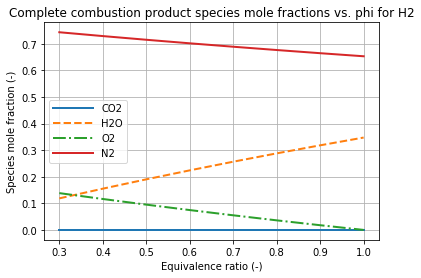

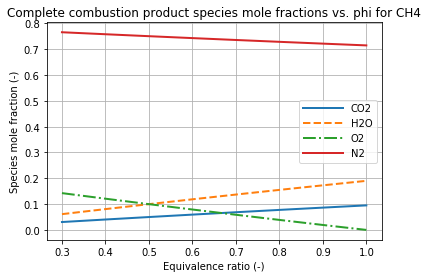

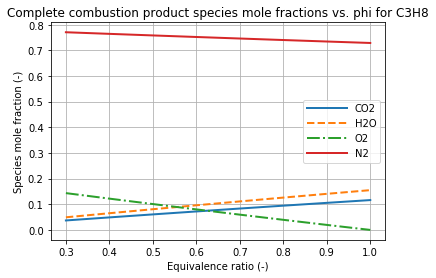

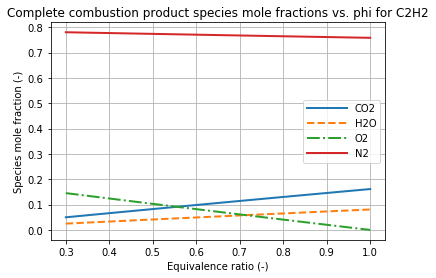

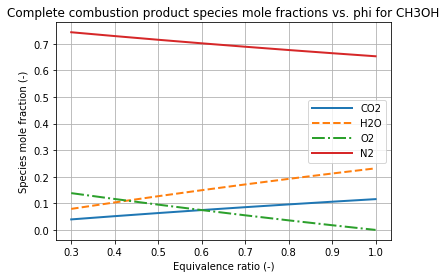

In [16]:
# plot the results, with one figure per fuel
for i, fuel in enumerate(fuels):
    
    fig, ax = plt.subplots()
    ax.plot(phis , X_prods[i,:,0] , label='CO2' , ls='solid'  , lw=2)
    ax.plot(phis , X_prods[i,:,1] , label='H2O' , ls='dashed' , lw=2)
    ax.plot(phis , X_prods[i,:,2] , label='O2'  , ls='dashdot', lw=2)
    ax.plot(phis , X_prods[i,:,3] , label='N2'  , ls='solid'  , lw=2)
    
# note the use of basic string manipulation to set the plot title and the file name for each fuel
    ptitle   = "Complete combustion product species mole fractions vs. phi for " + fuel
    filename = "Xprod_vs_phi_" + fuel + ".pdf"
    
    ax.set(xlabel='Equivalence ratio (-)',
           ylabel='Species mole fraction (-)',
           title = ptitle)
    ax.legend(handlelength=4,loc='best')
    ax.grid(True)
    fig.savefig(filename)

The amounts of CO2 and H2O that are formed for fuel-lean to stoichiometric reactants are determined (to a first approximation) by stoichiometric considerations (element balances) alone.

## 4. Fuel-rich combustion ($\Phi>1$)

As discussed earlier, considerations beyond element balances (stoichiometry) are needed even to make a reasonable first approximation for the product composition in the case of fuel-rich combustion. The necessary tools will be developed as we continue through Chapter 2 and subsequent chapters of Turns 4th ed.